In [47]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os
from os.path import dirname,join
import sys
import csv
import __main__
import json

sys.path.append('/home/mht/PythonProjects/dbo')
from src.benchmark_functions_2D import *
from matplotlib import cm

import pandas as pd
import seaborn as sns
import itertools

# colors = ['navy','darkblue','mediumblue','blue']
colors = ['m','g','b','c']


result_to_dump = 'ackley/query_dist'
function_dict = {'bird':Bird(), 'disk':Disk(), 'ackley': Ackley(), 'rosenbrock': Rosenbrock(),
                 'eggholder': Eggholder()}
obj = function_dict.get(result_to_dump.split('/')[0])
objective = lambda x: - obj.function(x)
SLIDES = True
sns.set(style="darkgrid")
grid_elemets = []
for [i,j] in obj.domain:
    grid_elemets.append(np.linspace(i, j, 100))
_grid = np.array(list(itertools.product(*grid_elemets)))

def load_data():
    root_dir = '/home/mht/PythonProjects/dbo'
    results_dir = join(join(root_dir, 'result'), result_to_dump)
    dirs = [dir for dir in os.listdir(results_dir) if os.path.isdir(os.path.join(results_dir, dir))]
    i = 2
    dfs = []
    for result_dir in sorted(dirs):
        file_dir = join(join(join(root_dir, 'result'), result_to_dump), result_dir)
        dfs.append(pd.read_csv(os.path.join(file_dir, 'data/data.csv')))

    return dfs




In [50]:
dfs = load_data()
df = pd.concat(dfs, ignore_index=True)
def get_queries(alg, start_iter, to_iter, df):
    a1x1 = df[(df['iteration']<=to_iter) & (df['iteration']>=start_iter) & (df['alg']==alg)]['agent1_x1'].values
    a1x2 = df[(df['iteration']<=to_iter) & (df['iteration']>=start_iter) & (df['alg']==alg)]['agent1_x2'].values
    aox1 = np.concatenate([df[(df['iteration']<=to_iter) & (df['iteration']>=start_iter) & (df['alg']==alg)]['agent{}_x1'.format(i+2)].values for i in range(4)])
    aox2 = np.concatenate([df[(df['iteration']<=to_iter) & (df['iteration']>=start_iter) & (df['alg']==alg)]['agent{}_x2'.format(i+2)].values for i in range(4)])
    y = np.concatenate([df[df['iteration']<=to_iter]['agent{}_obs'.format(i+1)].values for i in range(5)])
    return a1x1, a1x2, aox1, aox2, y

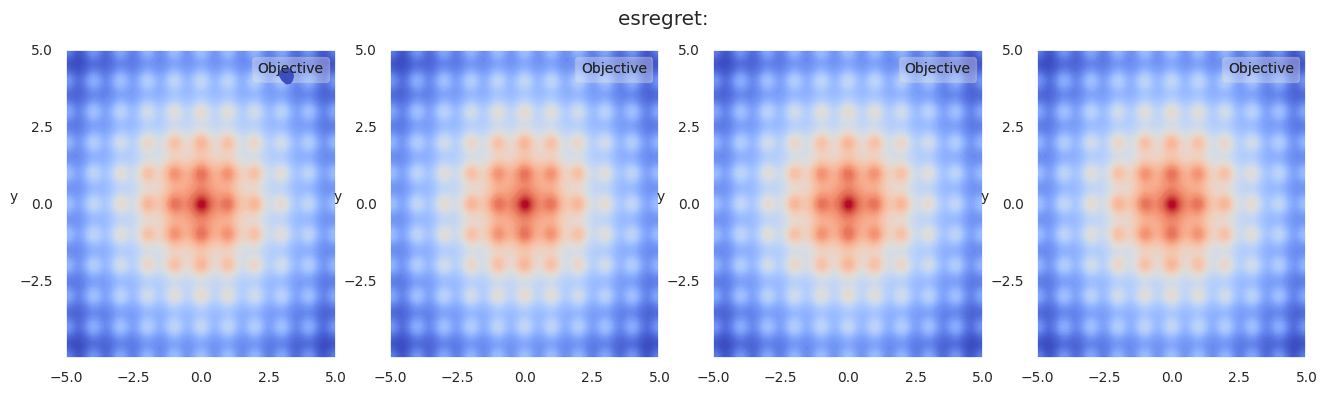

In [52]:
iters_to_show = [10, 50, 100, 150]

def _plot_2d(alg):

    cmap = cm.get_cmap('jet')
    rgba = [cmap(i) for i in np.linspace(0, 1, 5)]

    class ScalarFormatterForceFormat(ticker.ScalarFormatter):
        def _set_format(self):
            self.format = "%1.2f"
    fmt = ScalarFormatterForceFormat()
    fmt.set_powerlimits((0,0))
    fmt.useMathText = True


    first_param_grid = np.linspace(obj.domain[0,0], obj.domain[0,1], 100)
    second_param_grid = np.linspace(obj.domain[1,0], obj.domain[1,1], 100)
    X, Y = np.meshgrid(first_param_grid, second_param_grid, indexing='ij')



    N = 100
    Y_obj = [objective(i) for i in _grid]
    clev1 = np.linspace(min(Y_obj), max(Y_obj),N)

    fig, ax = plt.subplots(1, 4, figsize=(16, 4))
    for i in range(len(iters_to_show)): # , sharex=True
        cp1 = ax[i].contourf(X, Y, np.array(Y_obj).reshape(X.shape), clev1,  cmap = cm.coolwarm)
        for c in cp1.collections:
            c.set_edgecolor("face")
        # cbar1 = plt.colorbar(cp1, ax=ax[i], shrink = 0.9, format=fmt, pad = 0.05, location='right')
        # cbar1.ax.tick_params(labelsize=10)
        # cbar1.ax.locator_params(nbins=5)
        ax[i].autoscale(False)
        for j in range(i + 1):
            if j == 0:
                a1x1, a1x2, aox1, aox2, _ = get_queries(alg, 0, iters_to_show[j], dfs[0])
            else:
                a1x1, a1x2, aox1, aox2, _ = get_queries(alg, iters_to_show[j-1], iters_to_show[j], dfs[0])
            ax[i].scatter(a1x1, a1x2, zorder=10 - j + 1, color = 'b', s = 10)
            ax[i].scatter(aox1, aox2, zorder=10 - j, color = 'g', s = 10)
        ax[i].set_ylabel("y", fontsize = 10, rotation=0)
        leg1 = ax[i].legend(['Objective'], fontsize = 10, loc='upper right', handletextpad=0, handlelength=0, fancybox=True, framealpha = 0.2)
        ax[i].add_artist(leg1)
        ax[i].set_xlim([first_param_grid[0], first_param_grid[-1]])
        ax[i].set_ylim([second_param_grid[0], second_param_grid[-1]])
        ax[i].set_xticks(np.linspace(first_param_grid[0],first_param_grid[-1], 5))
        ax[i].set_yticks(np.linspace(second_param_grid[0],second_param_grid[-1], 5))
        plt.setp(ax[i].get_yticklabels()[0], visible=False)
        ax[i].tick_params(axis='both', which='both', labelsize=10)

        ax[i].tick_params(axis='both', which='major', labelsize=10)
        ax[i].tick_params(axis='both', which='minor', labelsize=10)
        # fig.subplots_adjust(wspace=0, hspace=0)
        ax[i].yaxis.offsetText.set_fontsize(10)
        fig.suptitle(alg + r'regret: ')


_plot_2d('es')

In [53]:
a1x1

NameError: name 'a1x1' is not defined